In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
import csv

In [33]:
EWR_DA_data = "Detailed_Statistics_Departures-Delta-EWR.csv"

In [34]:
EWR_DA_data_df = pd.read_csv(EWR_DA_data, header=6)

In [35]:
New_EWR_DA_data_df= EWR_DA_data_df[["Carrier Code", "Date (MM/DD/YYYY)", "Destination Airport", "Scheduled departure time",
                                   "Actual departure time", "Departure delay (Minutes)","Delay Carrier (Minutes)",
                                   "Delay Weather (Minutes)", "Delay National Aviation System (Minutes)",
                                   "Delay Security (Minutes)", "Delay Late Aircraft Arrival (Minutes)"
                                   ]]


New_EWR_DA_data_df.head()

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,01/01/2017,ATL,06:15,06:11,-4.0,0.0,0.0,0.0,0.0,0.0
1,DL,01/01/2017,ATL,07:29,07:26,-3.0,0.0,0.0,0.0,0.0,0.0
2,DL,01/01/2017,SLC,17:20,17:13,-7.0,0.0,0.0,0.0,0.0,0.0
3,DL,01/01/2017,ATL,15:09,15:05,-4.0,0.0,0.0,0.0,0.0,0.0
4,DL,01/01/2017,DTW,16:20,16:15,-5.0,0.0,0.0,0.0,0.0,0.0


In [36]:
New_EWR_DA_data_df.count()
New_EWR_DA_data_df = New_EWR_DA_data_df.dropna(how='any')

New_EWR_DA_data_df.count()

Carrier Code                                15487
Date (MM/DD/YYYY)                           15487
Destination Airport                         15487
Scheduled departure time                    15487
Actual departure time                       15487
Departure delay (Minutes)                   15487
Delay Carrier (Minutes)                     15487
Delay Weather (Minutes)                     15487
Delay National Aviation System (Minutes)    15487
Delay Security (Minutes)                    15487
Delay Late Aircraft Arrival (Minutes)       15487
dtype: int64

In [37]:
New_EWR_DA_data_df1=New_EWR_DA_data_df.groupby(['Date (MM/DD/YYYY)'],as_index=False).agg({'Departure delay (Minutes)':'sum'})

New_EWR_DA_data_df1

,Date (MM/DD/YYYY),Departure delay (Minutes)
0,01/01/2017,-39.0
1,01/01/2018,456.0
2,01/01/2019,-43.0
3,01/02/2017,163.0
4,01/02/2018,75.0
...,...,...
998,12/29/2018,624.0
999,12/30/2017,144.0
1000,12/30/2018,101.0
1001,12/31/2017,-1.0


In [38]:
delay_date_df=pd.DataFrame(New_EWR_DA_data_df1)
delay_date_df['Date'] = pd.to_datetime(delay_date_df['Date (MM/DD/YYYY)'])
delay_date_df_unsort=delay_date_df.drop(['Date (MM/DD/YYYY)'],axis=1)
delay_date_sort_df=delay_date_df_unsort.sort_values(by=['Departure delay (Minutes)'],ascending=False)
delay_date_sort_df

,Departure delay (Minutes),Date
560,2839.0,2019-07-06
622,2737.0,2018-07-27
523,2597.0,2018-06-24
643,2542.0,2018-08-03
575,2517.0,2019-07-11
...,...,...
338,-103.0,2019-04-23
356,-103.0,2019-04-29
881,-104.0,2017-11-01
332,-107.0,2019-04-21


In [39]:
final_date_df=delay_date_sort_df.head(20)
date = delay_date_sort_df.head(1)
date.iloc[0]['Date']

Timestamp('2019-07-06 00:00:00')

([<matplotlib.axis.XTick at 0x1a246f9c10>,
 <a list of 20 Text xticklabel objects>)

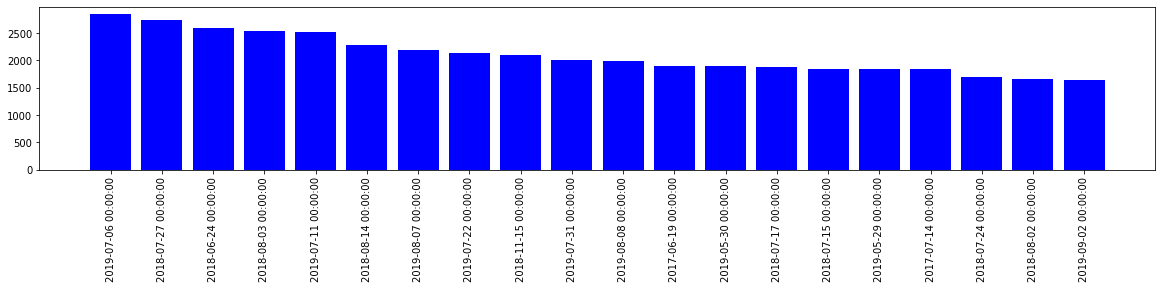

In [40]:
# Set x axis and tick locations
x_axis = np.arange(len(final_date_df))
tick_locations = [value for value in x_axis]
y_axis=final_date_df['Departure delay (Minutes)']
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_locations, final_date_df['Date'],rotation="vertical")

In [41]:
EWR_check_reason=New_EWR_DA_data_df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()
EWR_check_reason['Date']= pd.to_datetime(EWR_check_reason['Date (MM/DD/YYYY)'])
EWR_check_reason
EWR_check_reason.to_csv("EWR_DA_date.csv",index=False)
EWR_check_reason


,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,01/01/2017,-39.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
1,01/01/2018,456.0,354.0,12.0,29.0,0.0,43.0,2018-01-01
2,01/01/2019,-43.0,0.0,0.0,0.0,0.0,0.0,2019-01-01
3,01/02/2017,163.0,8.0,0.0,85.0,0.0,78.0,2017-01-02
4,01/02/2018,75.0,27.0,0.0,0.0,0.0,0.0,2018-01-02
...,...,...,...,...,...,...,...,...
998,12/29/2018,624.0,444.0,0.0,0.0,0.0,117.0,2018-12-29
999,12/30/2017,144.0,27.0,21.0,14.0,0.0,32.0,2017-12-30
1000,12/30/2018,101.0,54.0,0.0,0.0,0.0,16.0,2018-12-30
1001,12/31/2017,-1.0,0.0,16.0,23.0,0.0,0.0,2017-12-31


In [42]:
EWR_check_reason_check=EWR_check_reason.loc[EWR_check_reason['Date']==date.iloc[0]['Date']]
EWR_check_reason_check

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
560,07/06/2019,2839.0,2775.0,0.0,25.0,0.0,0.0,2019-07-06


In [43]:
EWR_check_reason_check.iloc[0][0]
n=EWR_check_reason_check.iloc[0].count()
EWR_check_reason_check.columns[5].split(" ")[0]
value =[]
heading=[]
for i in range(n-1):
    if EWR_check_reason_check.columns[i].split(" ")[0] == "Delay":
        print(EWR_check_reason_check.columns[i])
        value.append(EWR_check_reason_check.iloc[0][i])
        heading.append(EWR_check_reason_check.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [44]:
max(value)
value.index(max(value))
reason=heading[value.index(max(value))]
print("Reason for delay is {}".format(reason))

Reason for delay is Delay Carrier (Minutes)


Text(0.5, 1.0, 'for date 2019-07-06, main reason for delay is Carrier')

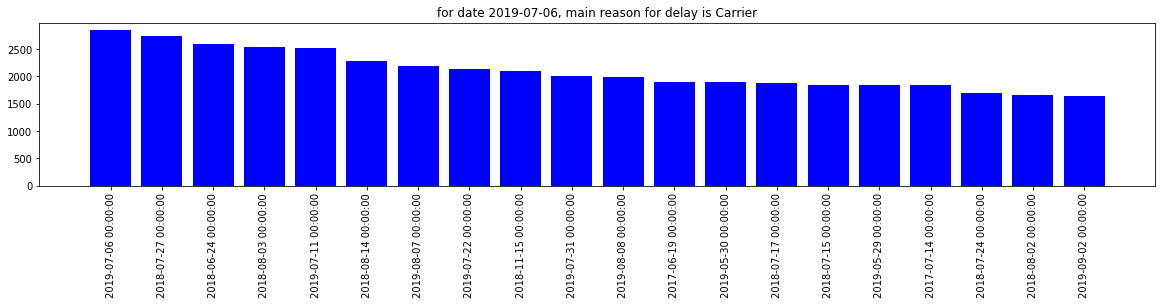

In [45]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_locations, final_date_df['Date'],rotation="vertical")
plt.title("for date {}, main reason for delay is {}".format(str(date.iloc[0]['Date']).split(" ")[0],reason.split(" ")[1]))

In [46]:
date1 = delay_date_sort_df.head(3)
date1

,Departure delay (Minutes),Date
560,2839.0,2019-07-06
622,2737.0,2018-07-27
523,2597.0,2018-06-24


In [47]:
EWR_check_reason_check=EWR_check_reason.loc[EWR_check_reason['Date']==date1.iloc[2]['Date']]
EWR_check_reason_check

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
523,06/24/2018,2597.0,1768.0,732.0,72.0,0.0,98.0,2018-06-24


# Group by date and destination Airport


In [48]:
EWR_DA_data_final_des=New_EWR_DA_data_df.groupby(['Date (MM/DD/YYYY)','Destination Airport'],as_index=False).agg({'Departure delay (Minutes)':'sum'})
delay_date_des_df=pd.DataFrame(EWR_DA_data_final_des)
delay_date_des_df
delay_date_des_df.to_csv("EWR_DA_delay_date_des.csv",index=False)
delay_date_des_df

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes)
0,01/01/2017,ATL,-20.0
1,01/01/2017,DTW,-5.0
2,01/01/2017,MSP,-7.0
3,01/01/2017,SLC,-7.0
4,01/01/2018,ATL,293.0
...,...,...,...
3801,12/31/2017,SLC,-5.0
3802,12/31/2018,ATL,-9.0
3803,12/31/2018,DTW,-8.0
3804,12/31/2018,MSP,-3.0


In [49]:
delay_date_des_df['Date'] = pd.to_datetime(delay_date_des_df['Date (MM/DD/YYYY)'])
delay_date_des_df

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Date
0,01/01/2017,ATL,-20.0,2017-01-01
1,01/01/2017,DTW,-5.0,2017-01-01
2,01/01/2017,MSP,-7.0,2017-01-01
3,01/01/2017,SLC,-7.0,2017-01-01
4,01/01/2018,ATL,293.0,2018-01-01
...,...,...,...,...
3801,12/31/2017,SLC,-5.0,2017-12-31
3802,12/31/2018,ATL,-9.0,2018-12-31
3803,12/31/2018,DTW,-8.0,2018-12-31
3804,12/31/2018,MSP,-3.0,2018-12-31


In [50]:
delay_date_des_df_unsort=delay_date_des_df.drop(['Date (MM/DD/YYYY)'],axis=1)
delay_date_des_df_unsort

,Destination Airport,Departure delay (Minutes),Date
0,ATL,-20.0,2017-01-01
1,DTW,-5.0,2017-01-01
2,MSP,-7.0,2017-01-01
3,SLC,-7.0,2017-01-01
4,ATL,293.0,2018-01-01
...,...,...,...
3801,SLC,-5.0,2017-12-31
3802,ATL,-9.0,2018-12-31
3803,DTW,-8.0,2018-12-31
3804,MSP,-3.0,2018-12-31


In [51]:
delay_date_des_sort_df=delay_date_des_df_unsort.sort_values(by=['Departure delay (Minutes)'],ascending=False)
delay_date_des_sort_plot_df=delay_date_des_sort_df.head(10)
EWR_DAcheck_des_reason=New_EWR_DA_data_df.groupby(['Date (MM/DD/YYYY)','Destination Airport'],as_index=False).sum()
EWR_DAcheck_des_reason['Date']= pd.to_datetime(EWR_DAcheck_des_reason['Date (MM/DD/YYYY)'])
EWR_DAcheck_des_reason
EWR_DAcheck_des_reason.to_csv("EWR_DA_delay_des_reason.csv",index=False)
EWR_DAcheck_des_reason

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,01/01/2017,ATL,-20.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
1,01/01/2017,DTW,-5.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,01/01/2017,MSP,-7.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,01/01/2017,SLC,-7.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,01/01/2018,ATL,293.0,220.0,12.0,29.0,0.0,43.0,2018-01-01
...,...,...,...,...,...,...,...,...,...
3801,12/31/2017,SLC,-5.0,0.0,0.0,0.0,0.0,0.0,2017-12-31
3802,12/31/2018,ATL,-9.0,0.0,0.0,18.0,0.0,0.0,2018-12-31
3803,12/31/2018,DTW,-8.0,0.0,0.0,0.0,0.0,0.0,2018-12-31
3804,12/31/2018,MSP,-3.0,0.0,0.0,0.0,0.0,0.0,2018-12-31


In [52]:
date1 = delay_date_des_sort_df.head(3)
date1.iloc[0]['Destination Airport']
EWR_DAcheck_reason_des_check=EWR_DAcheck_des_reason.loc[(EWR_DAcheck_des_reason['Destination Airport']==date1.iloc[0]['Destination Airport'])]
EWR_DAcheck_reason_des_check=EWR_DAcheck_reason_des_check[EWR_DAcheck_reason_des_check['Date']==date1.iloc[0]['Date']]
EWR_DAcheck_reason_des_check

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
2085,07/06/2019,ATL,2851.0,2775.0,0.0,25.0,0.0,0.0,2019-07-06


In [53]:
n=EWR_DAcheck_reason_des_check.iloc[0].count()
n
value_des=[]
heading_des=[]

for i in range(n-1):
    if EWR_DAcheck_reason_des_check.columns[i].split(" ")[0] == "Delay":
        print(EWR_DAcheck_reason_des_check.columns[i])
        value_des.append(EWR_DAcheck_reason_des_check.iloc[0][i])
        heading_des.append(EWR_DAcheck_reason_des_check.columns[i])
        

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [54]:
value_des
heading_des
max(value_des)
reason_des=heading_des[value_des.index(max(value_des))]
reason_des

'Delay Carrier (Minutes)'

Text(0.5, 1.0, 'Date 2019-07-06, main reason for delay is Carrier')

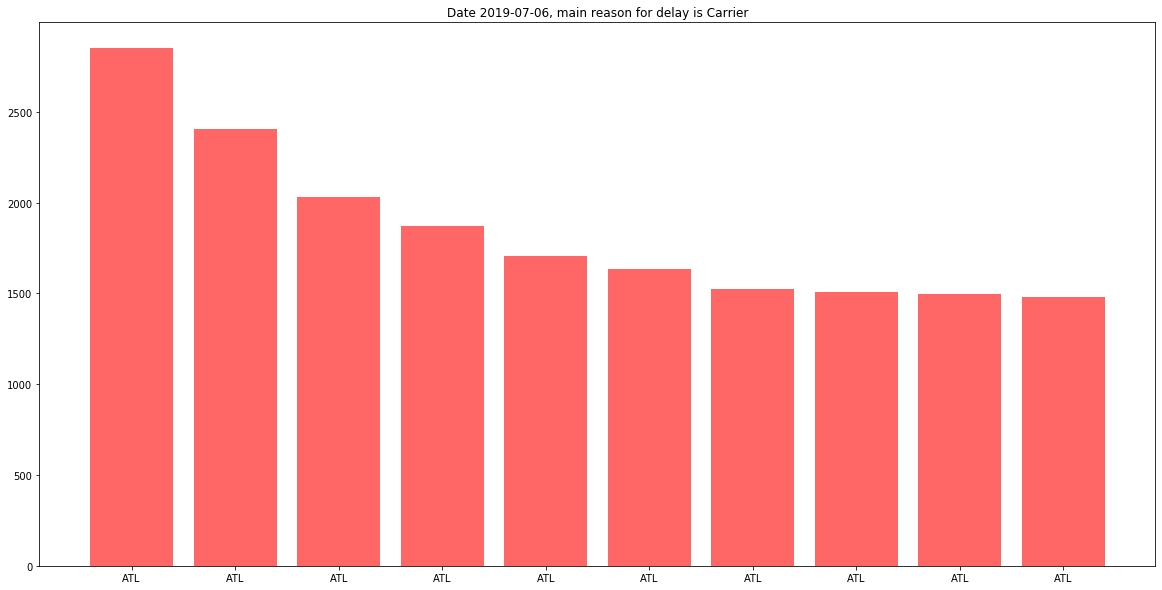

In [55]:
# Set x axis and tick locations
x_axis = np.arange(len(delay_date_des_sort_plot_df))
tick_locations = [value for value in x_axis]
y_axis=delay_date_des_sort_plot_df['Departure delay (Minutes)']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, delay_date_des_sort_plot_df['Destination Airport'])
plt.title("Date {}, main reason for delay is {}".format(str(date1.iloc[0]['Date']).split(" ")[0],reason_des.split(" ")[1]))

In [56]:
# Set data
x_axis =EWR_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis =EWR_check_reason['Delay Weather (Minutes)']

0       -39.0
1       456.0
2       -43.0
3       163.0
4        75.0
        ...  
998     624.0
999     144.0
1000    101.0
1001     -1.0
1002    -28.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [57]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

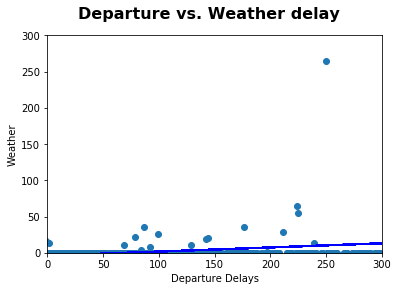

In [65]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs. Weather delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 300)
ax.set_ylim(0, 300)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Weather")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [66]:
# Set data
x_axis = EWR_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = EWR_check_reason['Delay Carrier (Minutes)']

0       -39.0
1       456.0
2       -43.0
3       163.0
4        75.0
        ...  
998     624.0
999     144.0
1000    101.0
1001     -1.0
1002    -28.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [67]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

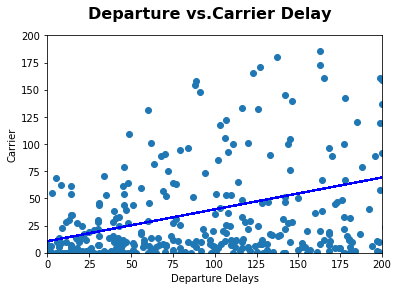

In [68]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Carrier Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Carrier")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [69]:
# Set data
x_axis = EWR_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = EWR_check_reason['Delay National Aviation System (Minutes)']

0       -39.0
1       456.0
2       -43.0
3       163.0
4        75.0
        ...  
998     624.0
999     144.0
1000    101.0
1001     -1.0
1002    -28.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [70]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

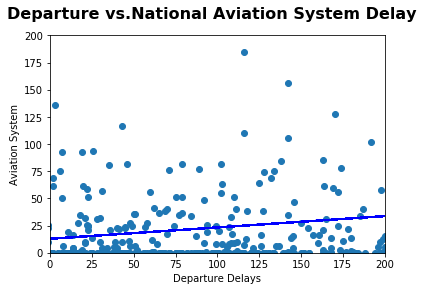

In [71]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.National Aviation System Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Aviation System")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [72]:
# Set data
x_axis = EWR_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = EWR_check_reason['Delay Security (Minutes)']

0       -39.0
1       456.0
2       -43.0
3       163.0
4        75.0
        ...  
998     624.0
999     144.0
1000    101.0
1001     -1.0
1002    -28.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


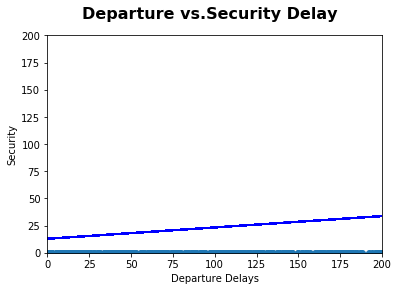

In [80]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Security Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Security")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [83]:
# Set data
x_axis = EWR_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = EWR_check_reason['Delay Late Aircraft Arrival (Minutes)']

0       -39.0
1       456.0
2       -43.0
3       163.0
4        75.0
        ...  
998     624.0
999     144.0
1000    101.0
1001     -1.0
1002    -28.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [84]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

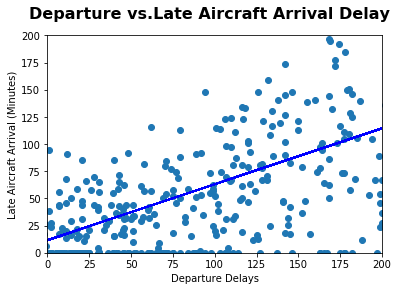

In [85]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Late Aircraft Arrival Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Late Aircraft Arrival (Minutes)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()